### PCB PostProcessing data

In [1]:
import sys
sys.path.append('..') 

import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### Transforming txt file in pandas DataFrame

In [2]:
#path = r"C:\Users\Desi\Desktop\TesiStanford\PCB\DESS\iSENS_2024_3_12_16_46_24.txt"  # path of the txt file you want to analyze
#path = r"C:\Users\Desi\Desktop\TesiStanford\PCB\iSENS_2024_3_12_15_41_51.txt"
#path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_29_10.txt" # right, channel 2
#path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_21_0.txt" #left. channel 1

#path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_21_59.txt" # right, channel 2, but weird shape
path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_12_10.txt" # left, channel 1, very similar to 12_21_0, and right_together
#path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_32_8.txt" # left and right, fino a -846
#path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_32_36.txt" # solo 1 valore
path = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\iSENS_2024_3_15_13_33_18.txt" 

f = open(path,"r") 
data = pd.DataFrame()
columns = ['time','DAC','Ch1','Ch2']
lines = []
for i,line in enumerate(f):
    #print(len(line))
    data[columns[i]] = line.split(',')[-282:]


In [3]:
#data['time'] = pd.to_datetime(data['time'])
data['DAC'] = pd.to_numeric(data['DAC'][pd.to_numeric(data['DAC'])>0])
data['Ch1'] = pd.to_numeric(data['Ch1'])/100
data['Ch2'] = pd.to_numeric(data['Ch2'])/100

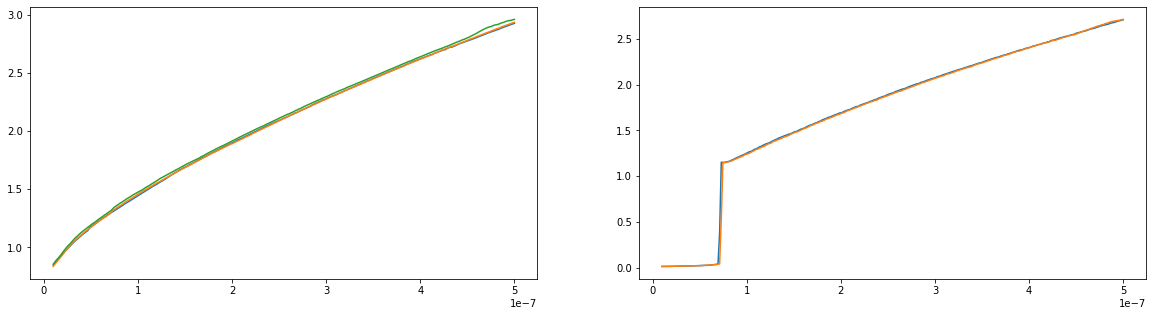

In [1033]:
# for 13_32_8, left plot is Ch2 (green) - Left OFET, right plot is Ch1 (yellow) - Right OFET
fig, ax = plt.subplots(1,2, figsize = (20,5))
for i in range(round(len(data)/282)):
    ax[0].plot(x2_l,data['Ch2'][i*282:(i+1)*282][:-1], label = 'step'+str(i))
    ax[0].legend()
    if i>0: ax[1].plot(x2_l,data['Ch1'][i*282:(i+1)*282][:-1], label = 'step'+str(i))
    ax[0].legend()
left_together = data['Ch2'][:281]
right_together = data['Ch1'][282:2*282][:-1]

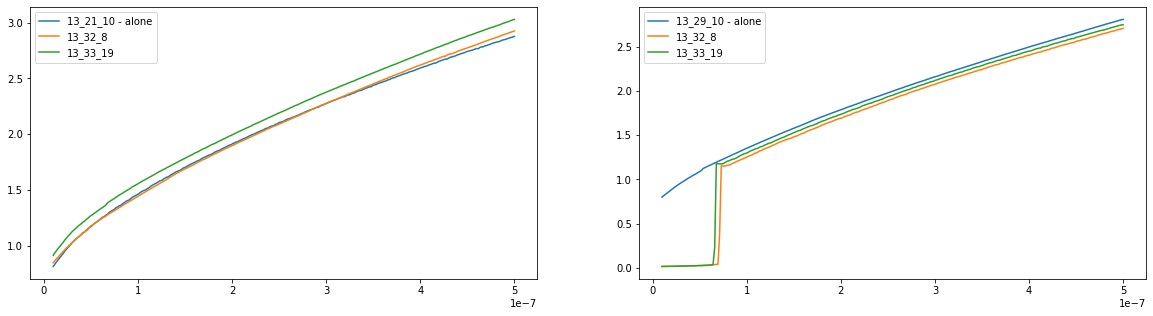

In [1078]:
# comparison bw 13_32_8 and 13_33_19. Blue is 13_33_19. left plot is Ch2 (green) - Left OFET, right plot is Ch1 (yellow) - Right OFET

fig, ax = plt.subplots(1,2, figsize = (20,5))
for i in range(round(len(data)/282)):
    ax[0].plot(x2_l,left[:-1], label = '13_21_10 - alone')
    ax[0].plot(x2_l,left_together, label = '13_32_8')
    ax[0].plot(x2_l,data['Ch2'][i*282:(i+1)*282][:-1], label = '13_33_19')
    ax[0].legend()
    
    #ax[1].plot(x2_l,ch2_21_59[:-1], label = '13_21_59')
    ax[1].plot(x2_l,ch2_29_10[:-1], label = '13_29_10 - alone')
    ax[1].plot(x2_l,right_together, label = '13_32_8')
    ax[1].plot(x2_l,data['Ch1'][i*282:(i+1)*282][:-1], label = '13_33_19')
    
    plt.legend()

In [1006]:
#ch2_21_59 = data['Ch2']
#ch2_29_10 = data['Ch2']
#ch1_21_10 = data['Ch1']

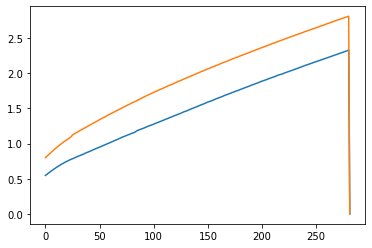

In [983]:
# right channel when is alone
plt.plot(ch2_21_59)
plt.plot(ch2_29_10)

In [542]:
left = data['Ch1'][125:]


In [523]:
#right = data['Ch2'][125:]

In [529]:
left_together = data['Ch1'][125:] # this is right
right_together = data['Ch2'][125:] #this is left

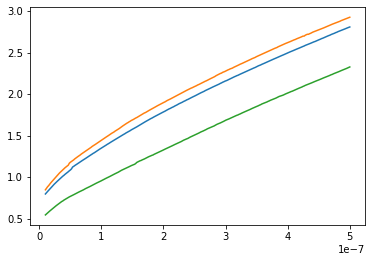

In [1052]:
plt.plot(x2_l,right[:-1])
plt.plot(x2_l,left_together)
plt.plot(x2_l,ch2_21_59[:-1])

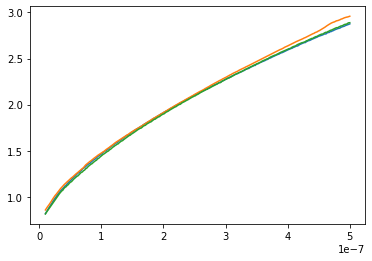

In [1007]:
plt.plot(x2_l,left[:-1])
plt.plot(x2_l,right_together[:-1])
plt.plot(x2_l,ch1_21_10[:-1])

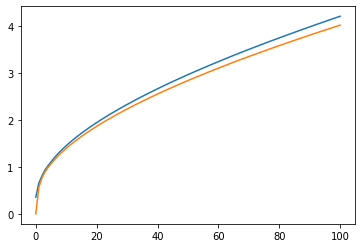

In [1054]:
plt.plot(keithley['DrainVLeft'])
plt.plot(keithley['DrainVRight'])

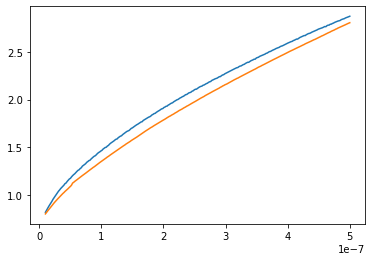

In [1055]:
plt.plot(x2_l,left[:-1])
plt.plot(x2_l,right[:-1])

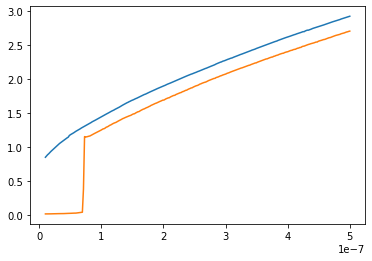

In [1057]:
plt.plot(x2_l,left_together)
plt.plot(x2_l,right_together)

Dai ue grafici di sopra si vede come Left è il VRight e viceversa

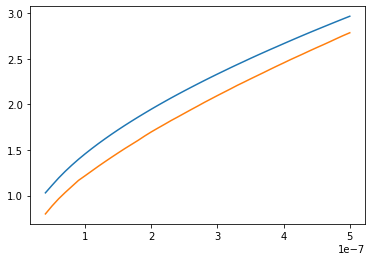

In [813]:
plt.plot(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainI'],keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainVRight']) #left
#plt.plot(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainI'],right_together[::6]) #left
plt.plot(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainI'],right[::6]) #left

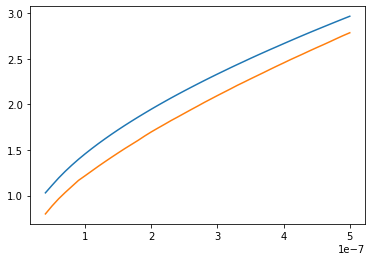

In [813]:
plt.plot(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainI'],keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainVRight']) #left
#plt.plot(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainI'],right_together[::6]) #left
plt.plot(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainI'],right[::6]) #left

In [674]:
offset_left = np.mean(left[::6]-np.array(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainVLeft']))
offset_right = np.mean(right[::6]-np.array(keithley[(keithley["DrainI"]>=30e-9) & (keithley["DrainI"]<=510e-9)]['DrainVRight']))

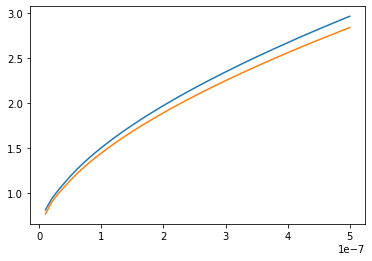

In [920]:
plt.plot(x1,keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVLeft'])
plt.plot(x1,keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVRight'])

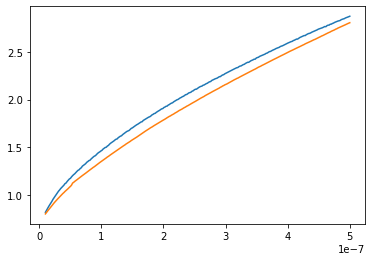

In [932]:
plt.plot(x2_l,left[:-1])
plt.plot(x2_l,right[:-1])

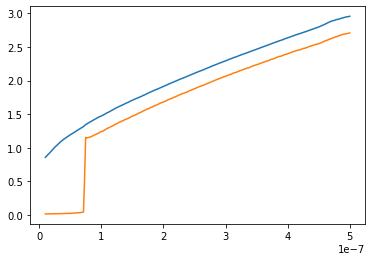

In [926]:
plt.plot(x2_l,right_together[:-1])
plt.plot(x2_l,left_together[:-1])

In [1144]:
x1 = np.linspace(10e-9, 500e-9, len(keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainI']))
x3 = np.linspace(54e-9, 544e-9, len(keithley[(keithley["DrainI"]>=54e-9) & (keithley["DrainI"]<=544e-9)]['DrainI']))
x3 = np.linspace(75e-9, 580e-9, len(keithley[(keithley["DrainI"]>=75e-9) & (keithley["DrainI"]<=580e-9)]['DrainI']))
x2_l = np.linspace(10e-9, 500e-9, len(right[:-1]))
x2_r = np.linspace(54e-9, 544e-9, len(left_together[:-1]))
x2_r = np.linspace(75e-9, 580e-9, len(left_together[:-1]))

In [771]:
#il right partiva da 55 e si fermava a 544 (green)
#il left partiva da 10 e si fermava a 500 (yellow)
# technically green and yellow seem to have an offset of around 40 nA.
#Il canale green è Ch2, che in questo notebook è nominato come right.
#Il canale yellow è Ch1, che in questo notebook viene denominato come left
# Abbiamo quindi comparato right e left con i valori di keithley che tecnicamente corrispondono ai valori di corrente che la pcb sta sourcing.

In [841]:
col_L = '#1E5986'
col_R = '#BF8F00'
col_diff = "#FF8080"

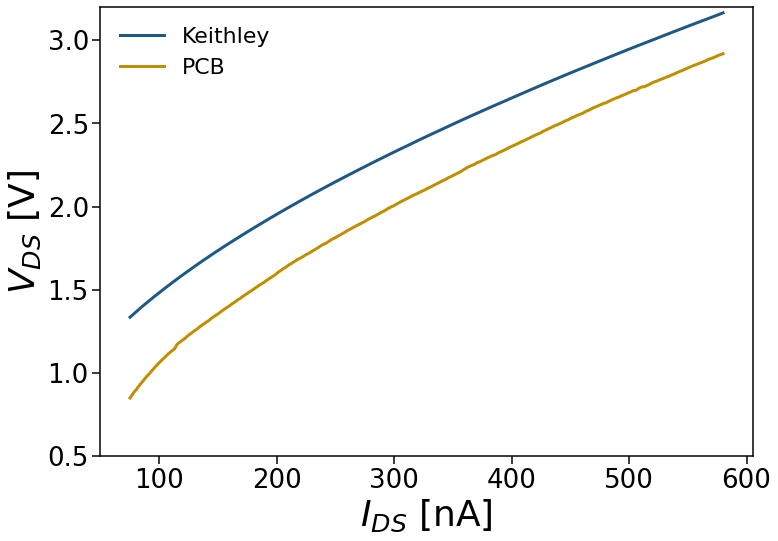

In [1147]:
fig, ax = plt.subplots(figsize = (11.69,8.26))
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
plt.plot(x3*1e9,keithley[(keithley["DrainI"]>=75e-9) & (keithley["DrainI"]<=580e-9)]['DrainVLeft'], label = 'Keithley', color = col_L, linewidth = 3) 
#plt.plot(x3*1e9,keithley[(keithley["DrainI"]>=55e-9) & (keithley["DrainI"]<=544e-9)]['DrainVLeft']+offset_small_array_L, label = 'kei_Right') 
plt.plot(x2_r*1e9,left_together[:-1], label = 'PCB', color = col_R, linewidth = 3) 

plt.legend(fontsize = 22, frameon=False)
#plt.grid()
ax.tick_params(axis='both', width=1.5,length=8,labelsize=26)
plt.legend(loc = 2,fontsize = 22, frameon=False)
ax.tick_params(axis='both', labelsize=26)
ax.set_ylim(0.5, 3.2)
plt.xlabel('$I_{DS}$ [nA]', fontsize = 36)
plt.ylabel('$V_{DS}$ [V]', fontsize = 36) 
plt.savefig(r"C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\Left_PCB.jpeg",bbox_inches='tight')

In [1111]:
len(keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=480e-9)]['DrainVLeft'])

47

In [1114]:
print(np.mean(np.array(left[:-1][::6])-keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=480e-9)]['DrainVLeft']))
print(np.std(np.array(left[:-1][::6])-keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=480e-9)]['DrainVLeft']))

-0.036786380970731725
0.015939281053505665


In [1139]:
print(np.mean(np.array(left[:-1][::6])-keithley[(keithley["DrainI"]>=54e-9) & (keithley["DrainI"]<=524e-9)]['DrainVLeft']))
print(np.std(np.array(left[:-1][::6])-(keithley[(keithley["DrainI"]>=54e-9) & (keithley["DrainI"]<=524e-9)]['DrainVLeft']+0.207)))

-0.20774116388280348
0.04520909467480158


In [1135]:
left_together[:-1].max()-keithley[(keithley["DrainI"]>=54e-9) & (keithley["DrainI"]<=544e-9)]['DrainVLeft'].max()

-0.16244807815551798

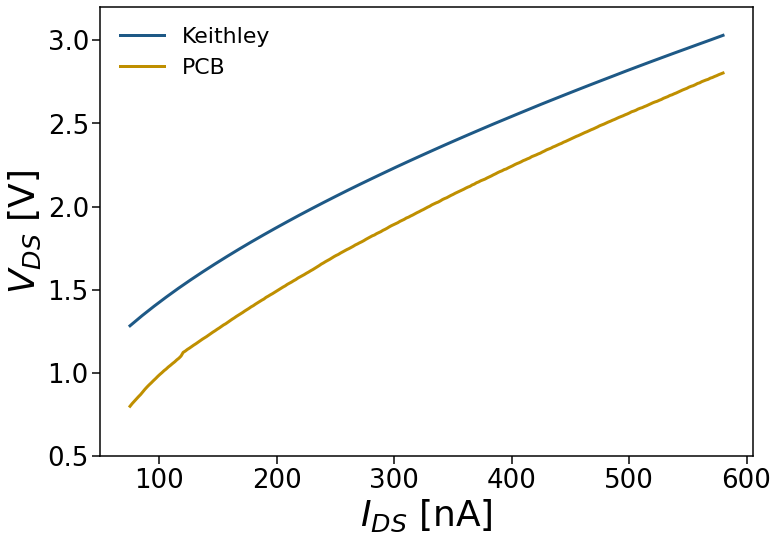

In [1149]:
# prova dove li mettiamo insieme, in questo caso left_together è stato preso ancora con Ch1, così come il grafico di su. Abbiamo un offset ma è ok

fig, ax = plt.subplots(figsize = (11.69,8.26))
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
plt.plot(x3*1e9,keithley[(keithley["DrainI"]>=75e-9) & (keithley["DrainI"]<=580e-9)]['DrainVRight'], label = 'Keithley', color = col_L, linewidth = 3) 
#plt.plot(x3*1e9,keithley[(keithley["DrainI"]>=55e-9) & (keithley["DrainI"]<=544e-9)]['DrainVRight']+offset_small_array_R, label = 'kei_Right') 
plt.plot(x2_r*1e9,right[:-2], label = 'PCB', color = col_R, linewidth = 3) 

plt.legend(fontsize = 22, frameon=False)
#plt.grid()
ax.tick_params(axis='both', width=1.5,length=8,labelsize=26)
plt.legend(loc = 2,fontsize = 22, frameon=False)
ax.tick_params(axis='both', labelsize=26)
ax.set_ylim(0.5, 3.2)
plt.xlabel('$I_{DS}$ [nA]', fontsize = 36)
plt.ylabel('$V_{DS}$ [V]', fontsize = 36) 
plt.savefig(r"C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\Right_PCB.jpeg",bbox_inches='tight')

In [1115]:
print(np.mean(np.array(right[:-1][::6])-keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=480e-9)]['DrainVRight']))
print(np.std(np.array(right[:-1][::6])-keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=480e-9)]['DrainVRight']))

-0.05562874632693353
0.030384100824014746


In [1142]:
print(np.mean(np.array(right[:-1][::6])-keithley[(keithley["DrainI"]>=54e-9) & (keithley["DrainI"]<=524e-9)]['DrainVRight']))
print(np.std(np.array(right[:-1][::6])-(keithley[(keithley["DrainI"]>=54e-9) & (keithley["DrainI"]<=524e-9)]['DrainVRight']+0.219)))

-0.21932274885380526
0.06325120360690718


In [939]:
right[:-1].max()-keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVRight'].max()

-0.03472813796997043

## MANTENERE QUESTI DUE PLOT. IL MOTIVO PER CUI NON STO PIU CONSIDERANDO LA CORRENTE A 50 UA E' CHE ENTRAMBE LE CURVE COMINCIANO DALLO STESSO LIVELLO DI TENSIONE, PER CUI SI IMMAGINA DEBBANO SOURCE LA STESSA CORRENTE, O COMUNQUE SIMILE, E UN OFFSET DI 40 NA E' TROPPO ALTO. INOLTRE LE CURVE MOSTRATE SU SONO RAGIONEVOLI, IN QUANTO NON C'E STATO BISOGNO DI NESSUN OFFSET. LA DIFFERENZA POTREBBE ESSERE DOVUTA AD UN REPROBING O ALLA STABILIZZAZIONE DELL'OFET STESSO, DIVERSE CONDIZIONI DEL SETUP SPERIMENTALE ETC

controllare che ci siano altri sweeps prima, per vedere se le curve sono piu simili
la corrente è stata misurata e registrata con un amperometro, ma non abbiamo un controllo di feedback che misura la corrente in tempo reale. I due canali potrebbero quindi variare leggermente nella corrente che è sourced nei due transistor, dunque i valori potrebbero non necessariamente essere precisi rispetto a quanto misurato, ma variare leggermente. Inoltre, va considerato che il fatto che si apossibile che le due smu source una diverse corrente, potrebbe compromettere l'utilizzo dei dispositivi e del principio di diode-connected differential approach, per cui questo è un principio da tenere in considerazione e ulteriori test dovranno essere condotti per verificare o ottimizzare la source di corrente. 

## NEXT TIME INCREASE THE RESOLUTION OF THE KEITHLEY - LOWER THE STEP

Text(0, 0.5, '$V_{DS}$ [V]')

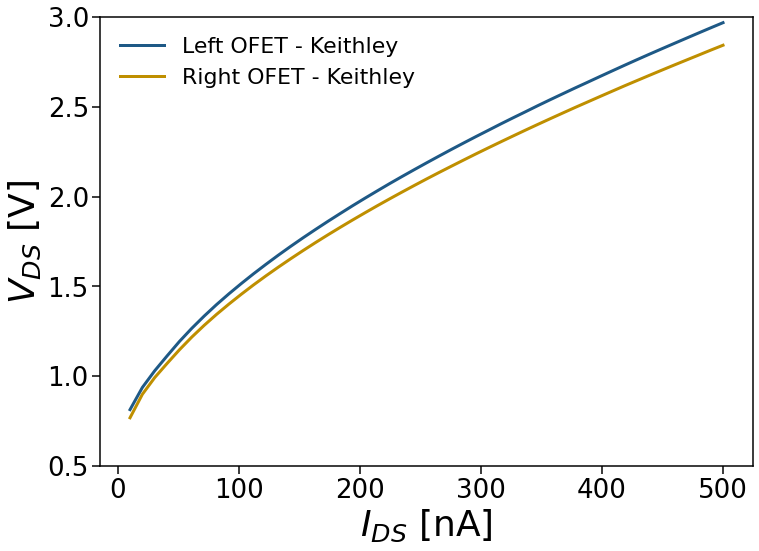

In [1102]:
# right together with 55, ch2

fig, ax = plt.subplots(figsize = (11.69,8.26))
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
plt.plot(x1*1e9,keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVLeft'], label = 'Left OFET - Keithley', color = col_L, linewidth = 3) 
plt.plot(x1*1e9,keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVRight'], label = 'Right OFET - Keithley', color = col_R, linewidth = 3) 
#plt.plot(x2_l*1e9,right_together[:-1], label = 'Left OFET - PCB', color = col_R, linewidth = 3) 

plt.legend(fontsize = 22, frameon=False)
#plt.grid()
ax.tick_params(axis='both', width=1.5,length=8,labelsize=26)
plt.legend(loc = 2,fontsize = 22, frameon=False)
ax.set_ylim(0.5, 3)
ax.tick_params(axis='both', labelsize=26)
plt.xlabel('$I_{DS}$ [nA]', fontsize = 36)
plt.ylabel('$V_{DS}$ [V]', fontsize = 36) 

Text(0, 0.5, '$V_{DS}$ [V]')

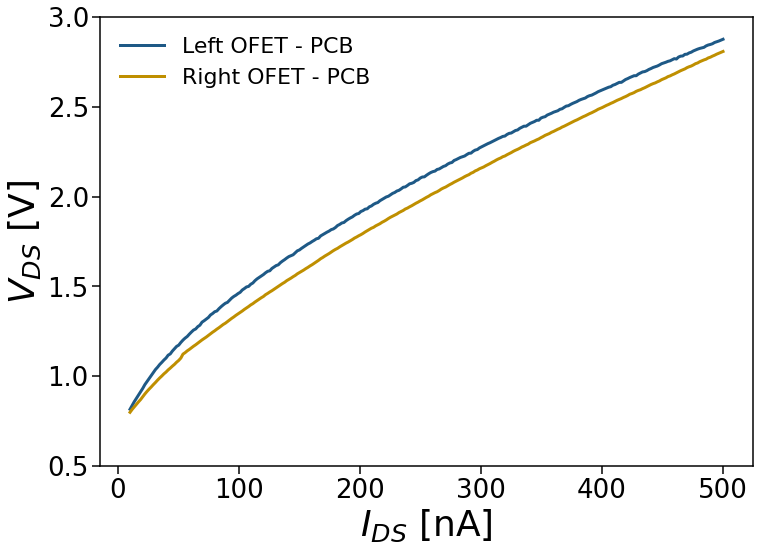

In [972]:
# right together with 55, ch2

fig, ax = plt.subplots(figsize = (11.69,8.26))
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
#plt.plot(x1*1e9,keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVLeft'], label = 'Left OFET - Keithley', color = col_L, linewidth = 3) 
#plt.plot(x1*1e9,keithley[(keithley["DrainI"]>=10e-9) & (keithley["DrainI"]<=500e-9)]['DrainVRight'], label = 'kei_Right', color = col_R, linewidth = 3) 
plt.plot(x2_l*1e9,left[:-1], label = 'Left OFET - PCB', color = col_L, linewidth = 3) 
plt.plot(x2_l*1e9,right[:-1], label = 'Right OFET - PCB', color = col_R, linewidth = 3) 

plt.legend(fontsize = 22, frameon=False)
#plt.grid()
ax.tick_params(axis='both', width=1.5,length=8,labelsize=26)
plt.legend(loc = 2,fontsize = 22, frameon=False)
ax.tick_params(axis='both', labelsize=26)
ax.set_ylim(0.5, 3)
plt.xlabel('$I_{DS}$ [nA]', fontsize = 36)
plt.ylabel('$V_{DS}$ [V]', fontsize = 36) 

In [950]:
offset_small_array_L = left[:-1].iloc[-1]-keithley[(keithley["DrainI"]>=55e-9) & (keithley["DrainI"]<=544e-9)]['DrainVLeft'].iloc[-1]
offset_small_array_R = right[:-1].iloc[0]-keithley[(keithley["DrainI"]>=55e-9) & (keithley["DrainI"]<=544e-9)]['DrainVRight'].iloc[0]

In [904]:
offset_small_array_L

-0.2573341979980466

In [804]:
offset_left = np.mean(right[:-1])-np.mean(keithley[(keithley["DrainI"]>=55e-9) & (keithley["DrainI"]<=544e-9)]['DrainVLeft'])
offset_left

-0.2365407303129201

In [8]:
utils.save_xls([data], 'iSENS_2024_2_19_18_54_27','PCB_data',additional_comment= None, mode = 2)

The directory exists
C:\Users\Desi\Desktop\TesiStanford\repo\WearS\PCB\03042024-iSENS_2024_2_19_18_54_27-PCB_data


'03042024-iSENS_2024_2_19_18_54_27-PCB_data'

#### run this cell if you want to compare PCB data with Keithley acquired data

In [4]:
path_keithley = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\031524-pcbcomp\031524-pcbcomp.xls"
keithley = pd.read_excel(path_keithley)
keithley

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Time,DrainI,DrainVLeft,GateI,DrainVRight
0,0.124423,0.000000e+00,0.007321,0.000000e+00,0.364137
1,0.188869,1.000000e-08,0.569844,1.000000e-08,0.662382
2,0.222256,2.000000e-08,0.768473,2.000000e-08,0.813830
3,0.255636,3.000000e-08,0.899329,3.000000e-08,0.937347
4,0.330399,4.000000e-08,0.992384,4.000000e-08,1.030370
...,...,...,...,...,...
96,3.446594,9.600000e-07,3.936525,9.600000e-07,4.120572
97,3.480066,9.700000e-07,3.957970,9.700000e-07,4.143198
98,3.513468,9.800000e-07,3.978822,9.800000e-07,4.165586
99,3.546849,9.900000e-07,3.999867,9.900000e-07,4.187778


In [912]:
#swapping  left with right
x = keithley['DrainVLeft']
keithley['DrainVLeft'] = keithley['DrainVRight']
keithley['DrainVRight'] = x

In [433]:
len(data[75:428][::6])

59

In [430]:
len(keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainVRight"])

59

In [443]:
initial_offeset_R = keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainVRight"].iloc[-1]-data[75:428][::6]['Ch2'].iloc[-1]
print('Initial offset: ',initial_offeset_R,' V')

Initial offset:  0.41232407379150393  V


In [445]:
initial_offeset_L = keithley[(keithley["DrainVLeft"]>=0.9) & (keithley["DrainVLeft"]<=2.02)]["DrainVLeft"].iloc[-1]-data[75:428][::6]['Ch1'].iloc[-1]
print('Initial offset: ',initial_offeset_L,' V')

Initial offset:  0.4757878189086915  V


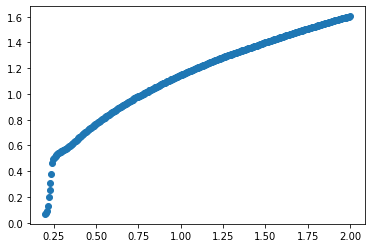

In [480]:
plt.scatter(data[65:428]['DAC'],data[65:428]['Ch2'])

## DISCARD THE FIRST TEN MEASUREMENTS OF EACH SWEEP

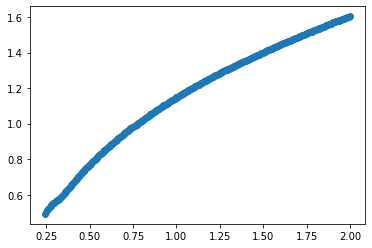

In [484]:
plt.scatter(data[75:428]['DAC'],data[75:428]['Ch2'])

6.999999868639861e-08 6.500000040432496e-07


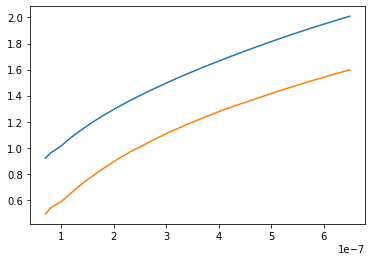

In [439]:
plt.plot(keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainI"],keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainVRight"])
plt.plot(keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainI"],data[75:428][::6]['Ch2'])
#plt.plot()
print(min(keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainI"]),max(keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainI"]))

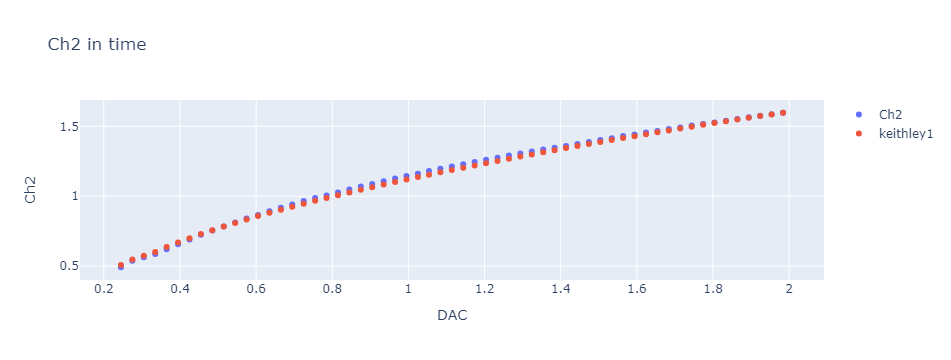

In [444]:
fig = px.scatter(data[75:428][::6], x="DAC", y="Ch2", title='Ch2 in time')
fig.data[0].name="Ch2"
fig.update_traces(showlegend=True)
#fig.add_scatter(x=data["DAC"], y=data["Ch1"], mode='markers',name = "Ch2")
#fig.add_scatter(x=data["DAC"][:450][::7], y=(keithley[(keithley["DrainI"]>=8e-9) & (keithley["DrainI"]<=630e-9)]["DrainVRight"]), mode='markers',name = "keithley1")
#fig.add_scatter(x=data[278:628], y=(keithley["DrainVRight"]), mode='markers',name = "keithley1")
fig.add_scatter(x=data[75:428][::6]['DAC'], y=keithley[(keithley["DrainVRight"]>=0.9) & (keithley["DrainVRight"]<=2.02)]["DrainVRight"]-initial_offeset_R, mode='markers',name = "keithley1")

fig.show()

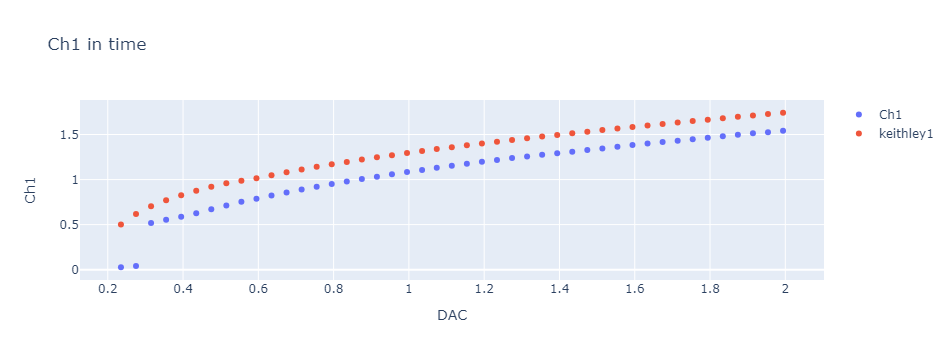

In [343]:
fig = px.scatter(data[73:428][::8], x="DAC", y="Ch1", title='Ch1 in time')
fig.data[0].name="Ch1"
fig.update_traces(showlegend=True)
#fig.add_scatter(x=data["DAC"], y=data["Ch1"], mode='markers',name = "Ch2")
#fig.add_scatter(x=data["DAC"][:450][::7], y=(keithley[(keithley["DrainI"]>=8e-9) & (keithley["DrainI"]<=630e-9)]["DrainVRight"]), mode='markers',name = "keithley1")
#fig.add_scatter(x=data[278:628], y=(keithley["DrainVRight"]), mode='markers',name = "keithley1")
fig.add_scatter(x=data["DAC"][73:428][::8], y=(keithley[(keithley["DrainI"]>=8e-9) & (keithley["DrainI"]<=462-9)]["DrainVRight"]), mode='markers',name = "keithley1")

fig.show()

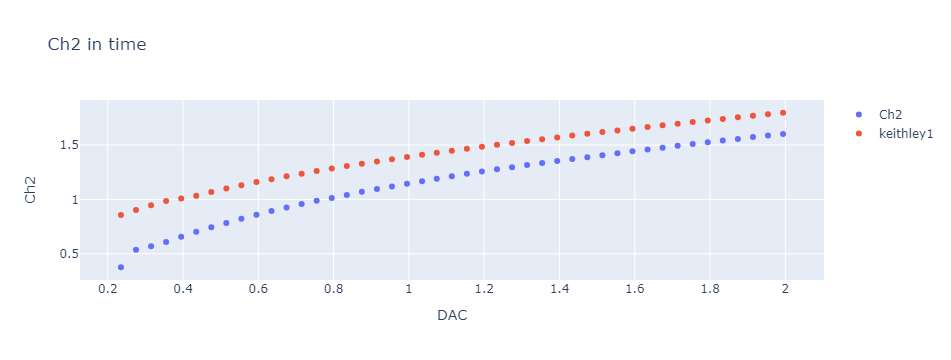

In [347]:
fig = px.scatter(data[73:428][::8], x="DAC", y="Ch2", title='Ch2 in time')
fig.data[0].name="Ch2"
fig.update_traces(showlegend=True)
#fig.add_scatter(x=data["DAC"], y=data["Ch1"], mode='markers',name = "Ch2")
#fig.add_scatter(x=data["DAC"][:450][::7], y=(keithley[(keithley["DrainI"]>=8e-9) & (keithley["DrainI"]<=630e-9)]["DrainVRight"]), mode='markers',name = "keithley1")
#fig.add_scatter(x=data[278:628], y=(keithley["DrainVRight"]), mode='markers',name = "keithley1")
fig.add_scatter(x=data["DAC"][73:428][::8], y=(keithley[(keithley["DrainI"]>=50e-9) & (keithley["DrainI"]<=600e-9)]["DrainVLeft"]), mode='markers',name = "keithley1")

fig.show()

In [127]:
mean_diff = np.mean(((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))-initial_offset)
std_diff = np.std(((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))-initial_offset)
print('Subtracting the initial offset. Diff Mean: ',mean_diff,'V. Diff Std: ', std_diff)

Mean:  -0.04516048995894619 . Std:  0.03436173364287672


In [124]:
mean_diff = np.mean((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))
std_diff = np.std((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))
print('Not subtracting the initial offset. Diff Mean: ',mean_diff,'. Std: ', std_diff)

Mean:  0.29147615964966583 . Std:  0.034361733642876716


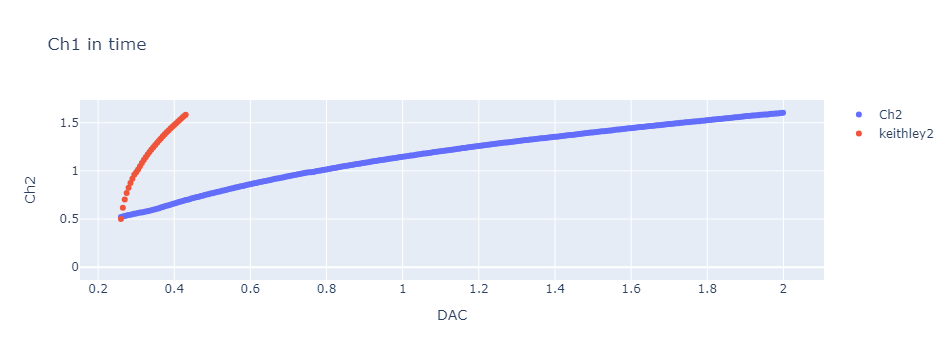

In [120]:
fig = px.scatter(data[278:628], x="DAC", y="Ch2", title='Ch1 in time')
fig.data[0].name="Ch2"
fig.update_traces(showlegend=True)
fig.add_scatter(x=data[278:628]["DAC"], y=keithley[(keithley["DrainVRight"]>0.5) & (keithley["DrainVRight"]<1.6)]["DrainVRight"], mode='markers',name = "keithley2")

#fig.add_scatter(x=data["DAC"], y=data["Ch1"], mode='markers',name = "Ch2")
#fig.add_scatter(x=data["DAC"], y=keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"], mode='markers',name = "keithley1")


fig.show()

Text(0, 0.5, '[V]')

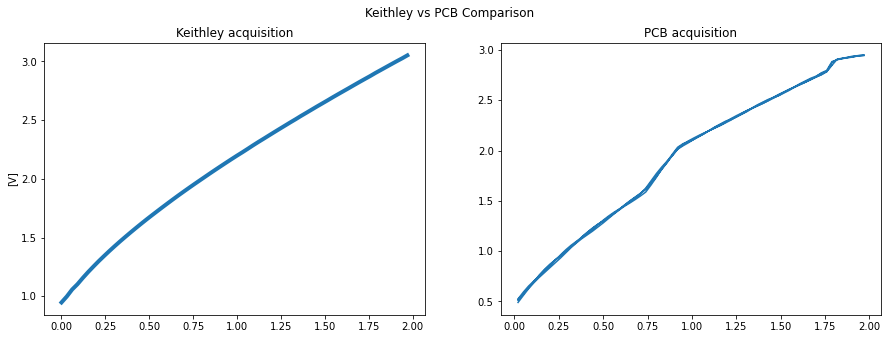

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Keithley vs PCB Comparison')
ax2.set_title('PCB acquisition')
ax1.set_title('Keithley acquisition')
ax2.plot(data['DAC'],data['Ch2'])
ax1.plot(np.arange(0,2,2/len(keithley[(keithley["DrainI"]>41e-9) & (keithley["DrainI"]<701e-9)]["DrainVRight"])),keithley[(keithley["DrainI"]>41e-9) & (keithley["DrainI"]<701e-9)]["DrainVRight"], linewidth = 4)
ax1.set_ylabel('[V]')